In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import tensorflow as tf

In [27]:
train = pd.read_csv('digit_recognizer/train.csv')
test = pd.read_csv('digit_recognizer/test.csv')


In [28]:
X = train.drop('label',axis=1)
y = train['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')

In [30]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [31]:
X_train.shape

(29400, 784)

In [32]:
y_train.shape

(29400, 10)

In [33]:
X_test.shape

(12600, 784)

In [34]:
y_test.shape

(12600, 10)

In [35]:
from tensorflow.keras import Sequential

In [36]:
from tensorflow.keras.layers import Dense

In [37]:
model = Sequential()

In [38]:
model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(200, activation='sigmoid'))
model.add(Dense(100, activation='sigmoid'))
model.add(Dense(60, activation='sigmoid'))
model.add(Dense(30, activation='sigmoid'))

model.add(Dense(10,activation='softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',
             metrics=['accuracy'])

In [39]:
model.fit(X_train,y_train,epochs=40,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/40
919/919 [==============================] - 4s 4ms/step - loss: 2.3268 - accuracy: 0.1027 - val_loss: 2.2995 - val_accuracy: 0.1102
Epoch 2/40
919/919 [==============================] - 3s 4ms/step - loss: 2.2994 - accuracy: 0.1115 - val_loss: 2.2967 - val_accuracy: 0.1102
Epoch 3/40
919/919 [==============================] - 4s 4ms/step - loss: 2.2964 - accuracy: 0.1151 - val_loss: 2.2929 - val_accuracy: 0.1102
Epoch 4/40
919/919 [==============================] - 4s 4ms/step - loss: 2.2929 - accuracy: 0.1186 - val_loss: 2.2891 - val_accuracy: 0.1102
Epoch 5/40
919/919 [==============================] - 3s 3ms/step - loss: 2.2900 - accuracy: 0.1273 - val_loss: 2.2845 - val_accuracy: 0.1685
Epoch 6/40
919/919 [==============================] - 4s 4ms/step - loss: 2.2838 - accuracy: 0.1947 - val_loss: 2.2781 - val_accuracy: 0.1102
Epoch 7/40
919/919 [==============================] - 3s 4ms/step - loss: 2.2762 - accuracy: 0.1574 - val_loss: 2.2661 - val_accuracy: 0.1261
Epoch 

In [40]:
df = pd.DataFrame(model.history.history)

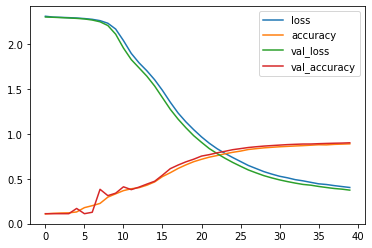

In [41]:
df.plot()

In [42]:
model.get_weights()

[array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.0000975 , 0.9998513 , 0.9998789 ,
        0.9999539 , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.9999916 , 0.99934244,
        1.0006135 , 1.0020083 , 1.0009404 , 1.0047241 , 1.0000603 ,
        0.99860066, 1.001605  , 0.99940443, 0.99962765, 0.99684983,
        0.9978587 , 0.99683857, 1.0000379 , 0.99991554, 0.9999052 ,
        0.9994123 , 0.99975413, 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.9999826 , 1.        ,
        1.0000632 , 0.9999647 , 1.0002509 , 0.99672496, 0.9995577 ,
        1.0115324 , 0.9923768 , 1.008911  , 1.011019  , 1.0350344 ,
        1.0179068 , 1.0005329 , 1.0226595 , 1.01

In [43]:
model.get_layer

<bound method Model.get_layer of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000002B06034F7C0>>

In [44]:
prediction = model.predict(X_test)
print(prediction)

[[7.96147579e-05 1.17304996e-01 4.35866900e-02 ... 1.93561762e-04
  7.71816194e-01 2.16773199e-03]
 [7.75040903e-08 9.76215959e-01 4.93660290e-03 ... 2.73007696e-04
  1.23377601e-02 1.37531571e-03]
 [5.59082480e-07 3.12052376e-04 7.38216659e-06 ... 5.36784269e-02
  1.83333317e-03 9.06357110e-01]
 ...
 [2.52894359e-03 1.15199236e-03 1.94285379e-03 ... 1.04950683e-03
  4.56219018e-01 3.93612729e-03]
 [1.87354386e-02 1.03792649e-04 6.61249214e-04 ... 4.40643431e-04
  9.74920467e-02 1.66069833e-03]
 [9.39554989e-01 5.05842593e-07 1.55562325e-03 ... 9.77147356e-05
  4.32022760e-04 8.56224869e-06]]


In [45]:
test = test.astype('float32')
prediction = model.predict(test[0:1])

In [46]:
predicted_num = np.argmax(prediction[0])
print(predicted_num)

2


In [47]:
print(prediction.shape)

(1, 10)


In [48]:
model.save('mnist_dnn_v1.h5')